In [1]:
import json
import pickle

from plotter import *

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
year = '2016'
pickle_path = '../../output/pickle/vhbb_official_v4/'+year+'/ParticleNet_msd.pkl'

In [3]:
ParticleNet_WorkingPoints = {
    '2016APV_bb':    [0.0, 0.9088, 0.9737, 0.9883],
    '2016APV_cc':    [0.0, 0.9252, 0.9751, 0.9909],

    '2016_bb': [0.0, 0.9137, 0.9735, 0.9883],
    '2016_cc': [0.0, 0.9252, 0.9743, 0.9905],

    '2017_bb':    [0.0, 0.9105, 0.9714, 0.9870],
    '2017_cc':    [0.0, 0.9347, 0.9765, 0.9909],

    '2018_bb':    [0.0, 0.9172, 0.9734, 0.9880],
    '2018_cc':    [0.0, 0.9368, 0.9777, 0.9917]
}

ddbthr = ParticleNet_WorkingPoints[year+'_bb'][-1]
print(ddbthr)

0.9883


In [4]:
with open('../../files/lumi.json') as f:
  lumi = json.load(f)

with open('../../files/xsec.json') as f:
  xs = json.load(f)

with open('../../files/pmap.json') as f:
  pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagSFbc_'+year+'Up','btagSFbc_'+year+'Down',
               'btagSFlight_'+year+'Up','btagSFlight_'+year+'Down',
               'UESUp','UESDown',
               'JESUp','JESDown',
               'JERUp','JERDown',
               'pileup_weightUp','pileup_weightDown',
               #'muon_ID_'+year+'_valueDown','muon_ID_'+year+'_valueDown',
               #'muon_ISO_'+year+'_valueDown','muon_ISO_'+year+'_valueDown',
               #'muon_TRIGNOISO_'+year+'_valueDown','muon_TRIGNOISO_'+year+'_valueDown',
               'L1PrefiningUp','L1PrefiringDown',
              ]

In [5]:
vh = pickle.load(open(pickle_path,'rb')).integrate('region','signal')

In [6]:
vh

<Hist (process,systematic,msd1,msd2,bb1,genflavor1,pt1) instance at 0x7ff73d68bd60>

In [7]:
vh.identifiers('systematic')

[<StringBin (JERDown) instance at 0x7ff73d68b0a0>,
 <StringBin (JERUp) instance at 0x7ff73d68b040>,
 <StringBin (JESDown) instance at 0x7ff73d686f10>,
 <StringBin (JESUp) instance at 0x7ff73d686eb0>,
 <StringBin (L1PrefiringDown) instance at 0x7ff73d686580>,
 <StringBin (L1PrefiringUp) instance at 0x7ff73d686d30>,
 <StringBin (PDF_weightDown) instance at 0x7ff73d68b3a0>,
 <StringBin (PDF_weightUp) instance at 0x7ff73d68b580>,
 <StringBin (PDFaS_weightDown) instance at 0x7ff73d68b400>,
 <StringBin (PDFaS_weightUp) instance at 0x7ff73d68b220>,
 <StringBin (UEPS_FSRDown) instance at 0x7ff73d68b1c0>,
 <StringBin (UEPS_FSRUp) instance at 0x7ff73d68b340>,
 <StringBin (UEPS_ISRDown) instance at 0x7ff73d68b5e0>,
 <StringBin (UEPS_ISRUp) instance at 0x7ff73d68b4c0>,
 <StringBin (UESDown) instance at 0x7ff73d686f40>,
 <StringBin (UESUp) instance at 0x7ff73d686fd0>,
 <StringBin (W_d2kappa_EWDown) instance at 0x7ff73d68b640>,
 <StringBin (W_d2kappa_EWUp) instance at 0x7ff73d68b700>,
 <StringBin (W

In [8]:
vh_pass = vh.sum('pt1','msd2').integrate('bb1',int_range=slice(ddbthr,1))
vh_fail = vh.sum('pt1','msd2').integrate('bb1',int_range=slice(0,ddbthr))

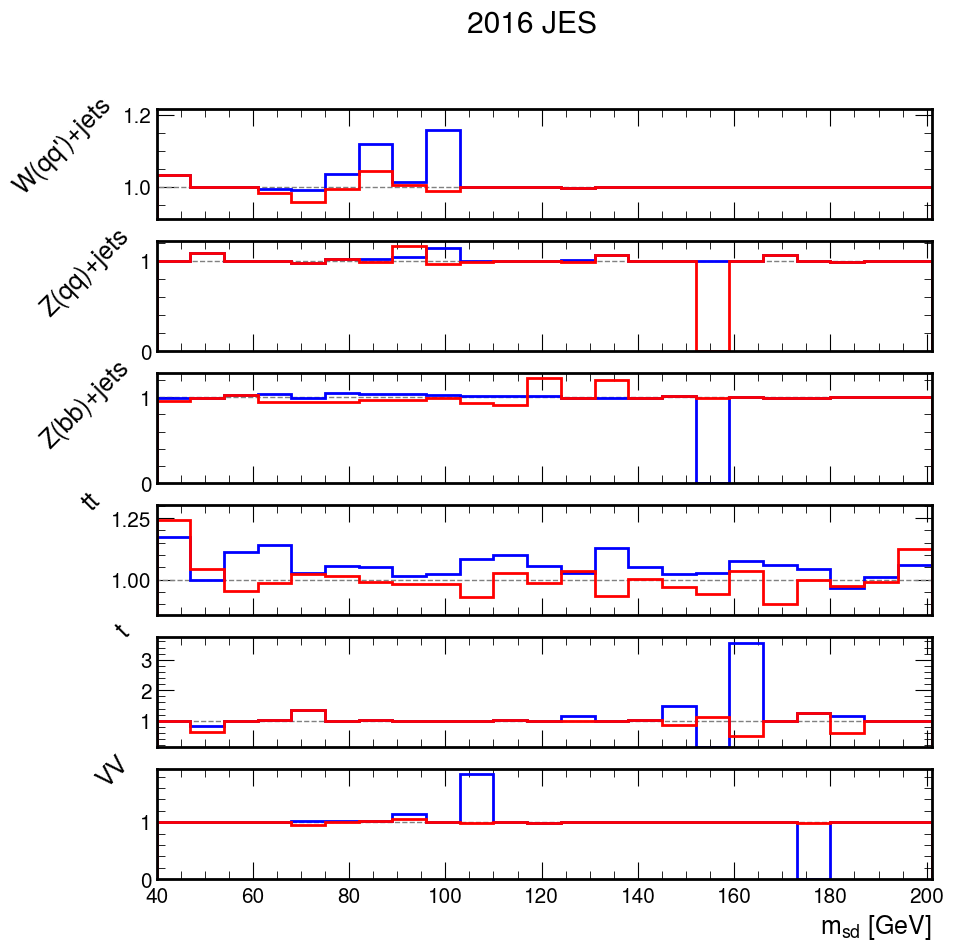

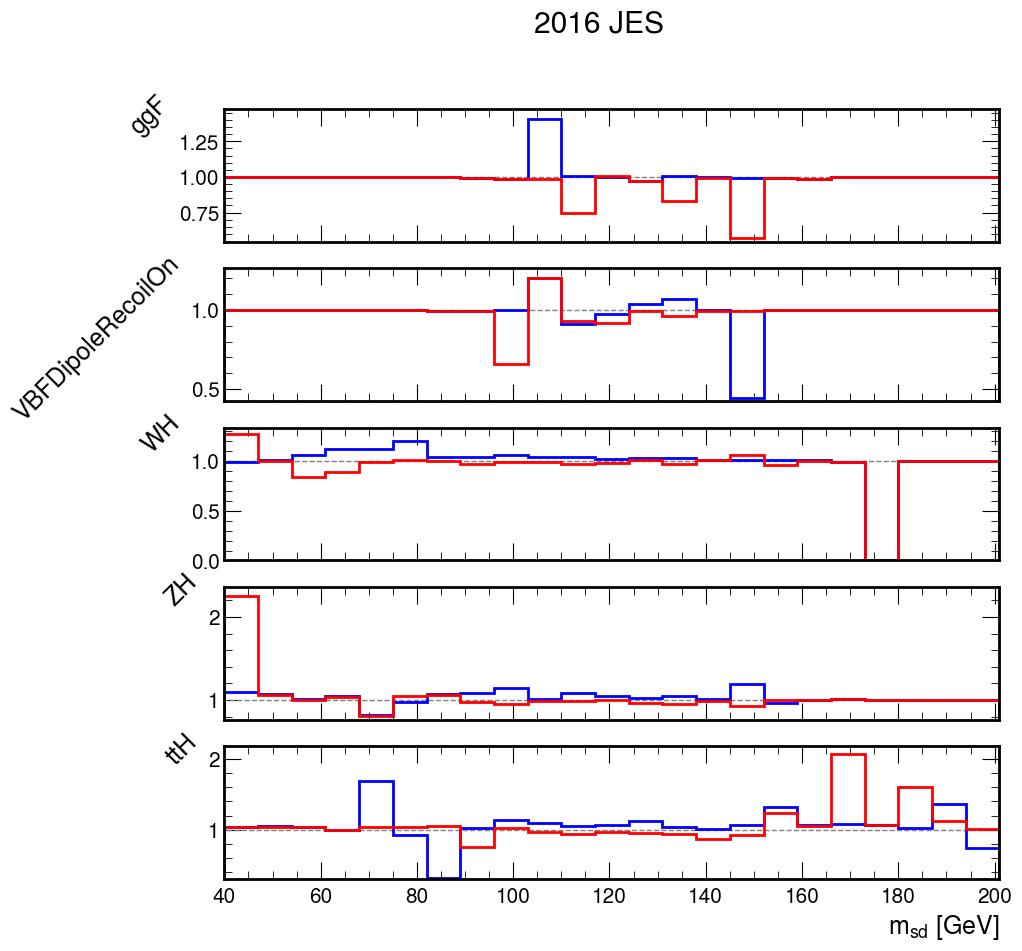

In [9]:
s = 'JES'
plot_syst_allbkg(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allsig(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)

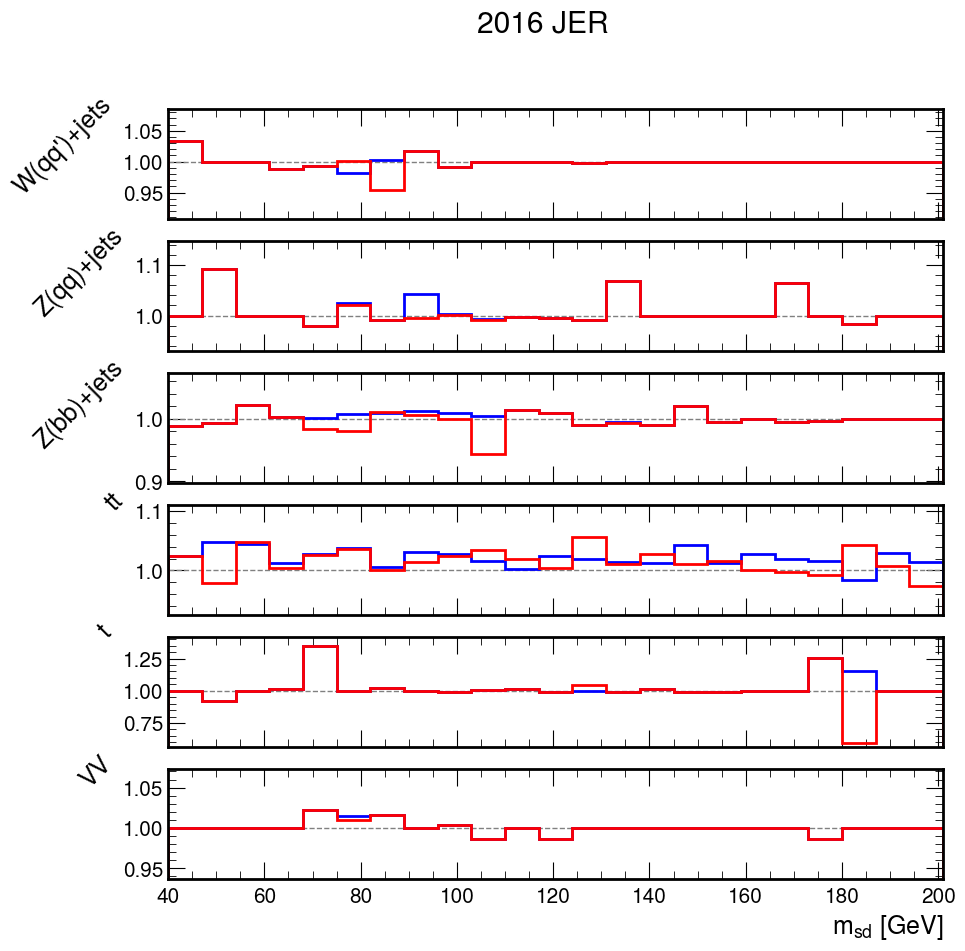

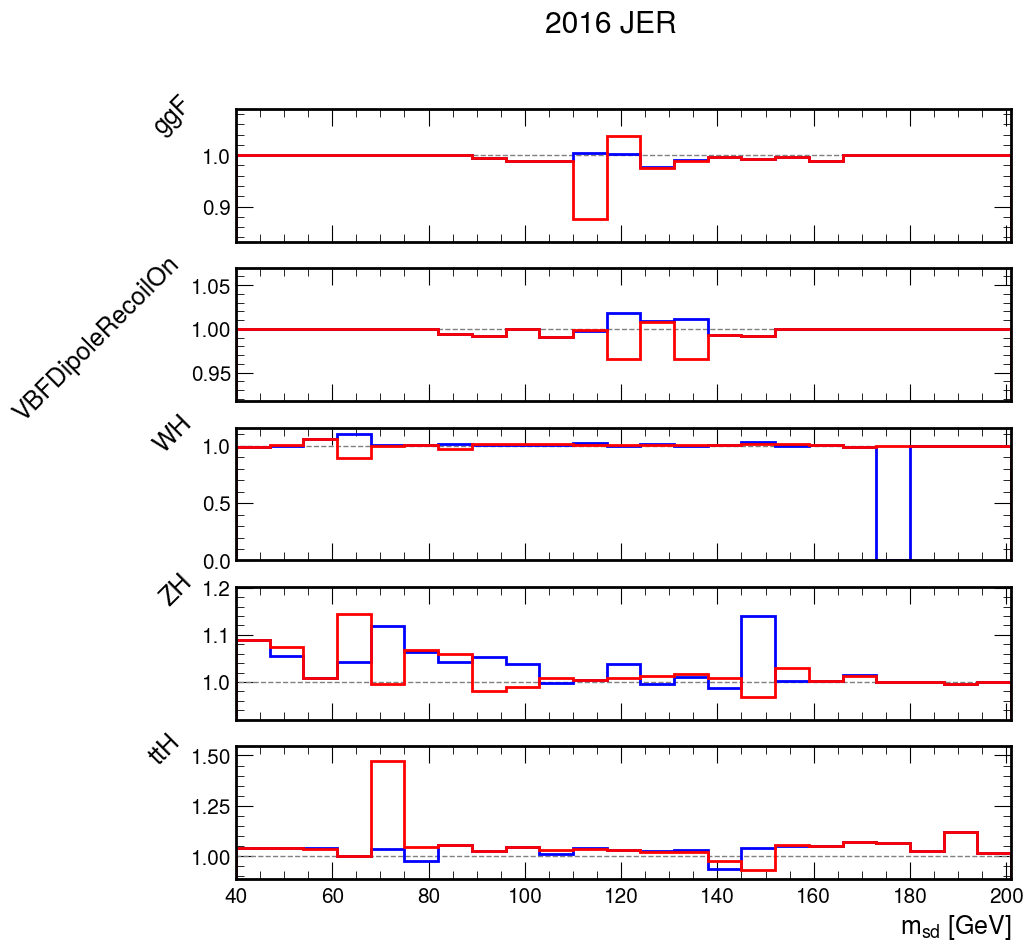

In [12]:
s = 'JER'
plot_syst_allbkg(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allsig(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)

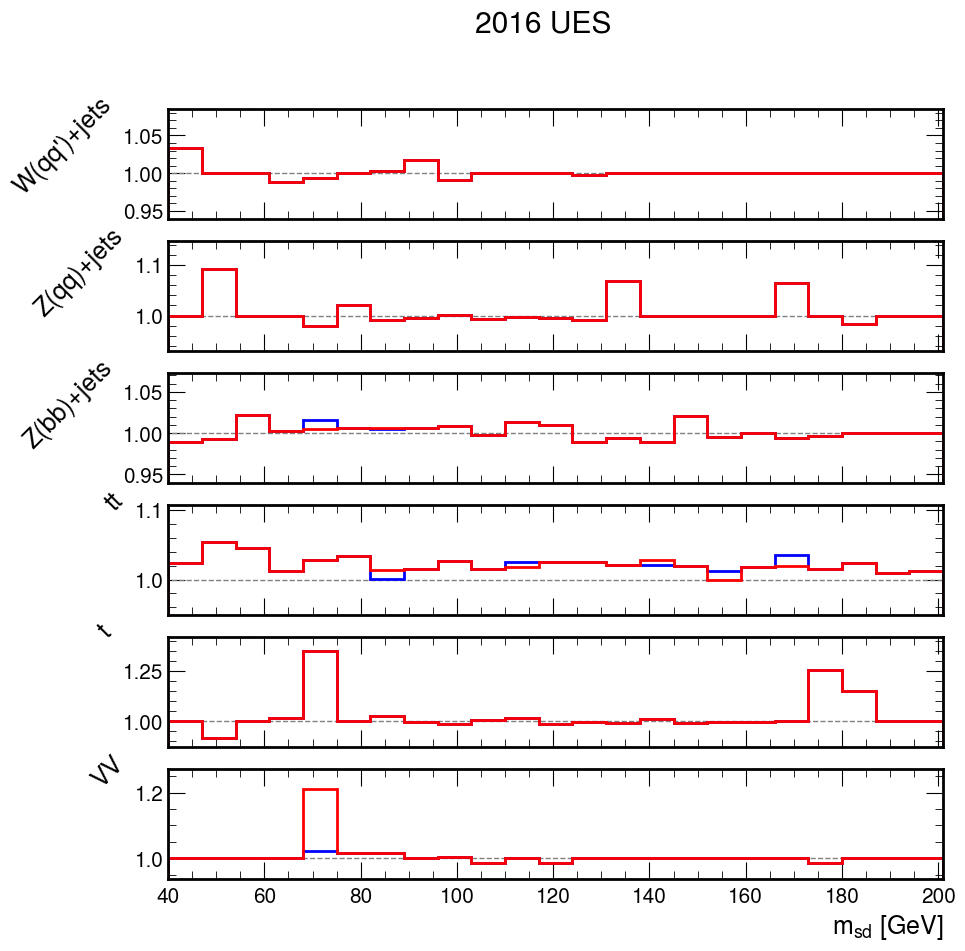

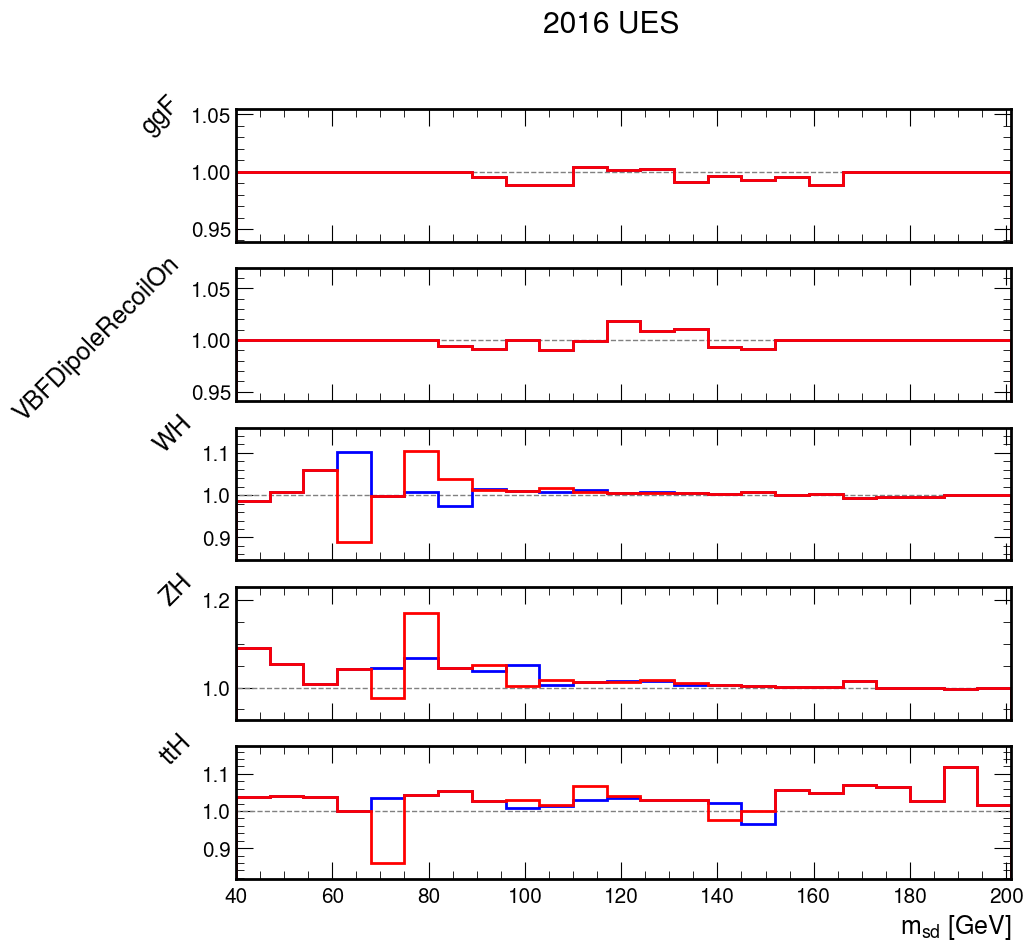

In [13]:
s = 'UES'
plot_syst_allbkg(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allsig(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)

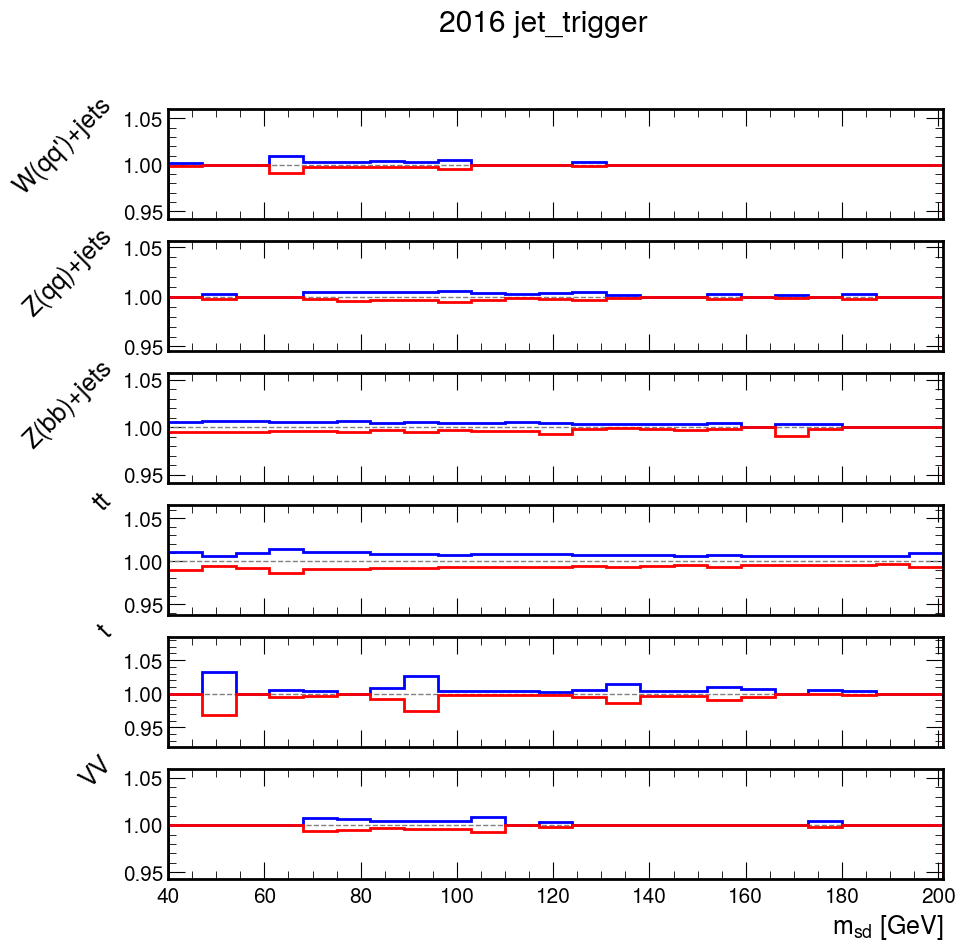

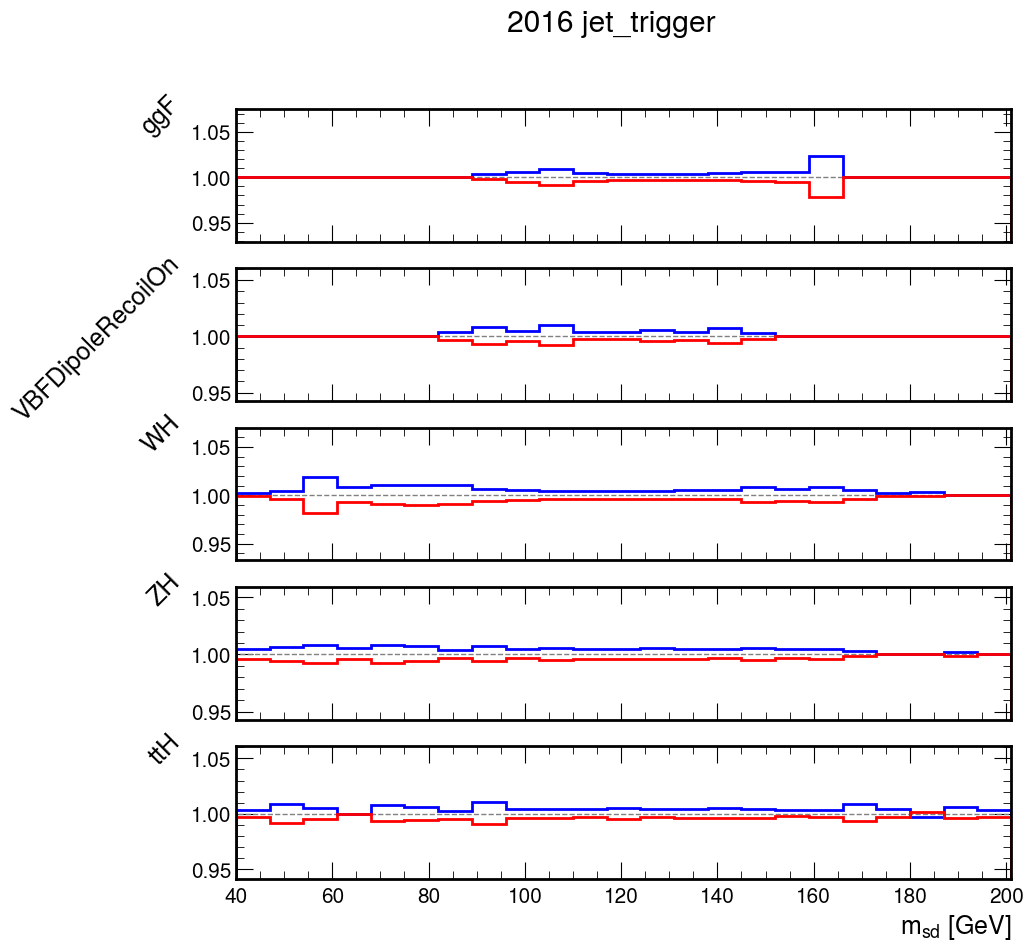

In [14]:
s = 'jet_trigger'
plot_syst_allbkg(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allsig(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)

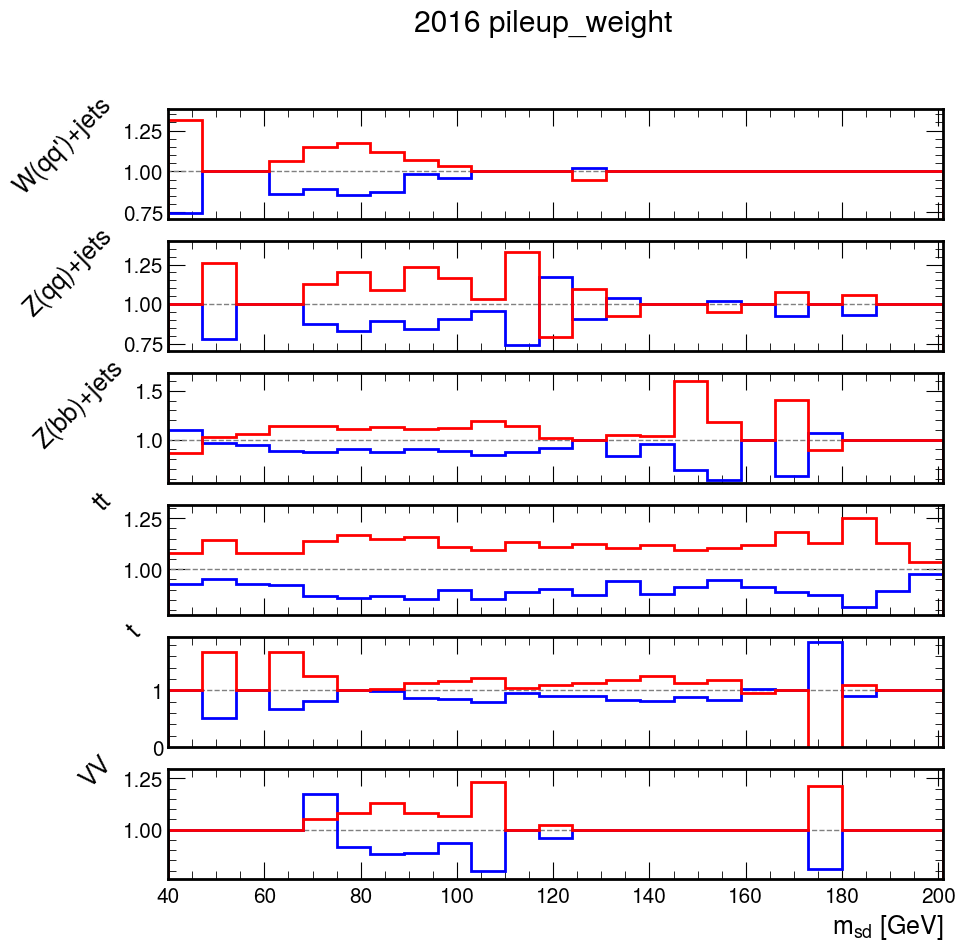

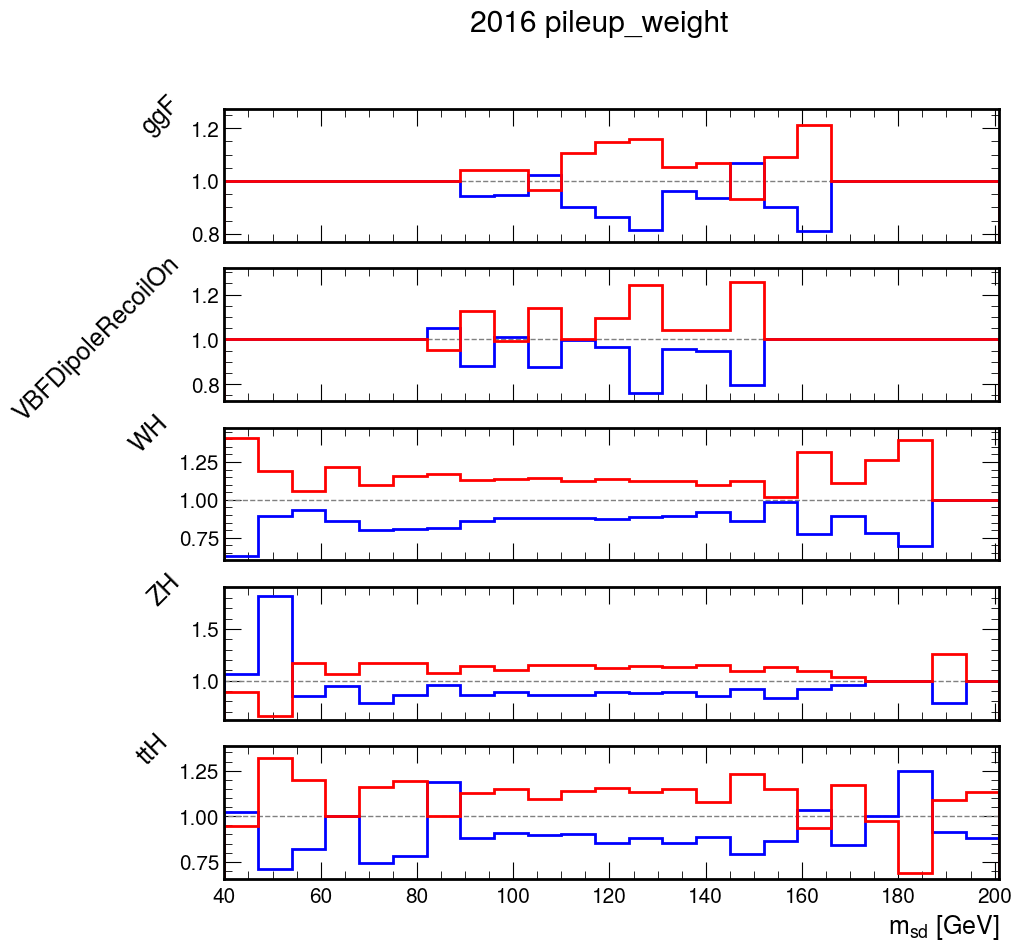

In [15]:
s = 'pileup_weight'
plot_syst_allbkg(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allsig(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)